In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [160]:
df = pd.read_csv(r"C:\Users\yetes\OneDrive\Desktop\Excel\Titanic-Dataset.csv")

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0


In [162]:
df = df[['Survived','Pclass','Sex','Fare','Age','Cabin','Embarked']]
df.head()

,Survived,Pclass,Sex,Fare,Age,Cabin,Embarked
0,0,3,0,7.2500,22.0,NaN,3.0
1,1,1,1,71.2833,38.0,C85,1.0
2,1,3,1,7.9250,26.0,NaN,3.0
3,1,1,1,53.1000,35.0,C123,3.0
4,0,3,0,8.0500,35.0,NaN,3.0


In [163]:
df.shape

(891, 7)

C:\Users\yetes\AppData\Local\Temp\ipykernel_13332\1091964672.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='blue',hist=False)
C:\Users\yetes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yetes\AppData\Local\Temp\ipykernel_13332\1091964672.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

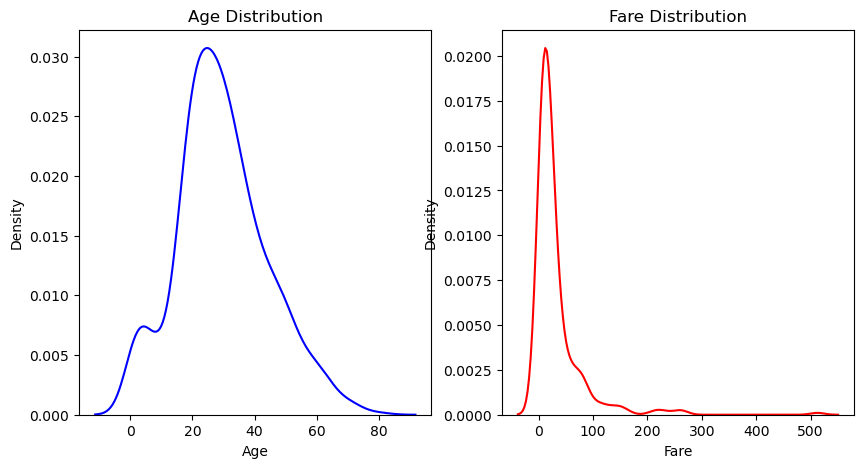

In [164]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'],color='blue',hist=False)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.distplot(df['Fare'],color='red',hist=False)
plt.title('Fare Distribution')

plt.show()

In [165]:
df['Fare'].skew()

4.787316519674893

In [166]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

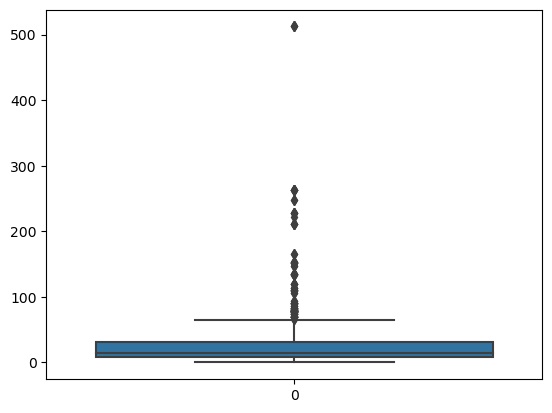

In [167]:
sns.boxplot(df['Fare'])

In [168]:
# Find the IQR
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)

In [169]:
print('25% : ',percentile25)
print('75% : ',percentile75)

25% :  7.9104
75% :  31.0


In [170]:
IQR = percentile75 - percentile25

In [171]:
IQR

23.0896

In [172]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [173]:
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)

Upper limit:  65.6344
Lower limit:  -26.724


***Finding the outlier***

In [174]:
df[df['Fare'] > upper_limit]

,Survived,Pclass,Sex,Fare,Age,Cabin,Embarked
1,1,1,1,71.2833,38.0,C85,1.0
27,0,1,0,263.0000,19.0,C23 C25 C27,3.0
31,1,1,1,146.5208,NaN,B78,1.0
34,0,1,0,82.1708,28.0,NaN,1.0
52,1,1,1,76.7292,49.0,D33,1.0
...,...,...,...,...,...,...,...
846,0,3,0,69.5500,NaN,NaN,3.0
849,1,1,1,89.1042,NaN,C92,1.0
856,1,1,1,164.8667,45.0,NaN,3.0
863,0,3,1,69.5500,NaN,NaN,3.0


In [182]:
df[df['Fare'] < lower_limit]

,Survived,Pclass,Sex,Fare,Age,Cabin,Embarked


***Trimming***

In [187]:
new_df = df[df['Fare'] < upper_limit]
new_df.shape

(775, 7)

In [188]:
new_df.shape

(775, 7)

***Comparing before and after***

C:\Users\yetes\AppData\Local\Temp\ipykernel_13332\1012471899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='red',hist=False)
C:\Users\yetes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yetes\AppData\Local\Temp\ipykernel_13332\1012471899.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fu

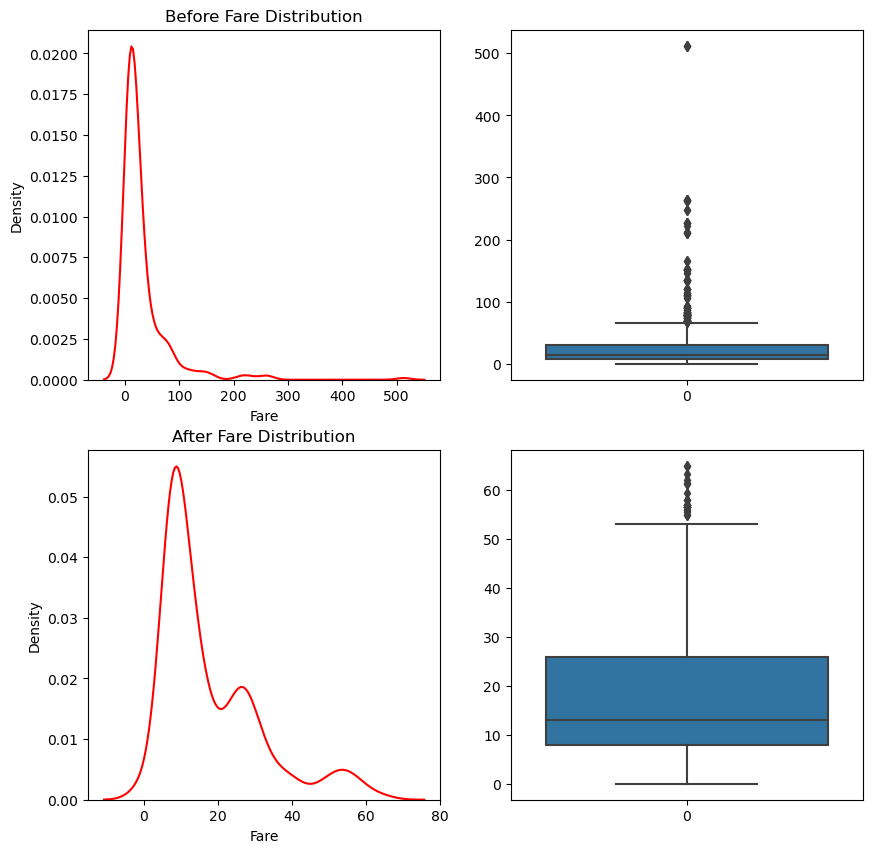

In [189]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Fare'],color='red',hist=False)
plt.title('Before Fare Distribution')

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df['Fare'],color='red',hist=False)
plt.title('After Fare Distribution')

plt.subplot(2,2,4)
sns.boxplot(new_df['Fare'])

plt.show()

***Capping method if our data having more outlier***

In [190]:
new_df_capping = df.copy()

new_df_capping['Fare'] = np.where(
new_df_capping['Fare'] > upper_limit,
upper_limit,
np.where(
new_df_capping['Fare'] < lower_limit,
lower_limit,
new_df_capping['Fare']
)
)

In [191]:
new_df_capping.shape

(891, 7)

C:\Users\yetes\AppData\Local\Temp\ipykernel_13332\1223280408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='red',hist=False)
C:\Users\yetes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yetes\AppData\Local\Temp\ipykernel_13332\1223280408.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fu

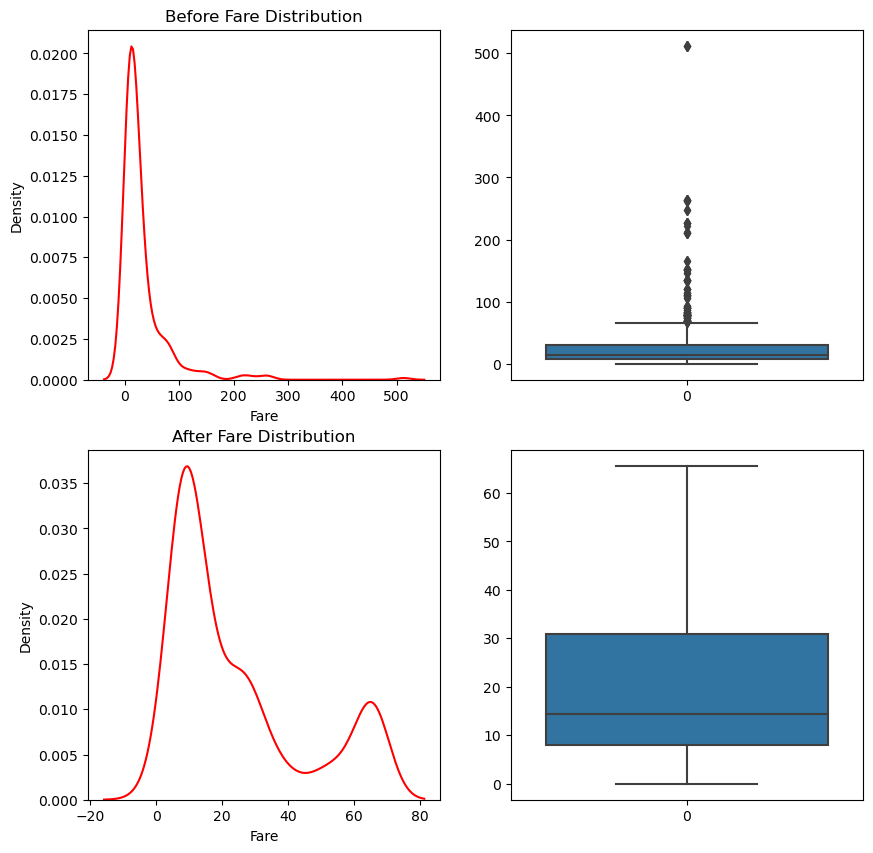

In [192]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Fare'],color='red',hist=False)
plt.title('Before Fare Distribution')

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df_capping['Fare'],color='red',hist=False)
plt.title('After Fare Distribution')

plt.subplot(2,2,4)
sns.boxplot(new_df_capping['Fare'])

plt.show()